# Nivell 1

- Exercici 1

Classifica els diferents vols utilitzant l'algorisme de K-means.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [2]:
# Load the dataframe
df=pd.read_csv ("data/DelayedFlights.csv")
#Remove the column ' Unnamed: 0'
df.drop('Unnamed: 0', axis=1, inplace=True)
# fill 0 if we don´t have data
df[['DepDelay',"ArrDelay"]]=df[['DepDelay',"ArrDelay"]].fillna(0)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
df["newArrDelay"]=df["ArrDelay"].apply(lambda x: 0 if x<1 else 1)
df["newArrDelay"].unique()

array([0, 1], dtype=int64)

In [4]:
#Data Transforming
le = preprocessing.LabelEncoder()

for col in df[['UniqueCarrier','Origin', 'Dest']]:
    df[col] = le.fit_transform(df[col])
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,newArrDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,17,335,...,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,0
1,2008,1,3,4,754.0,735,1002.0,1000,17,3231,...,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,1
2,2008,1,3,4,628.0,620,804.0,750,17,448,...,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN,1
3,2008,1,3,4,1829.0,1755,1959.0,1925,17,3920,...,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,1
4,2008,1,3,4,1940.0,1915,2121.0,2110,17,378,...,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,1


In [5]:
df=df[['Month', 'DayofMonth', 'DayOfWeek','DepDelay','ArrDelay','ArrTime','DepTime','Distance','UniqueCarrier','Origin', 'Dest']]
df.dropna(inplace=True)
df_sample = df.sample(1000).reset_index(drop=True)
df_sample.head()

,Month,DayofMonth,DayOfWeek,DepDelay,ArrDelay,ArrTime,DepTime,Distance,UniqueCarrier,Origin,Dest
0,11,1,6,80.0,74.0,1724.0,1606.0,334,15,199,212
1,6,6,5,98.0,93.0,1055.0,918.0,515,6,248,18
2,8,11,1,59.0,27.0,2034.0,1858.0,501,12,162,88
3,4,2,3,15.0,45.0,2108.0,1650.0,2421,6,150,259
4,3,9,7,108.0,94.0,2056.0,1748.0,874,6,250,18


In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_sample)

In [7]:
kmeans = KMeans(
       init="random",
        n_clusters=3,
        n_init=10,
        max_iter=300,
        random_state=42)

In [8]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [9]:
kmeans.inertia_

8985.158361019528

In [10]:
kmeans.cluster_centers_

array([[ 0.3137564 ,  0.09841129, -0.07366354,  2.31089518,  2.24052394,
        -0.84840639,  0.45748384,  0.08772146, -0.13727732,  0.20461523,
        -0.08075965],
       [ 0.02378495,  0.033324  , -0.05850443, -0.25643205, -0.25355531,
        -0.63838769, -0.83321762,  0.20769869, -0.01919243,  0.2168945 ,
         0.0651095 ],
       [-0.07229765, -0.0451233 ,  0.06290272, -0.15789842, -0.1488096 ,
         0.69372452,  0.6478206 , -0.19470077,  0.03925738, -0.2219264 ,
        -0.04321184]])

In [11]:
kmeans.n_iter_

17

In [12]:
 kmeans.labels_

array([2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1,
       0, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 0, 2, 0, 1, 2, 1, 1,
       2, 2, 1, 2, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 1,
       1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 0, 1, 2, 0, 1, 2, 1, 1, 0, 1,
       2, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2,
       0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 0,
       1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1,

In [13]:
kmeans_kwargs = {
      "init": "random",
       "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }
   
    # A list holds the SSE values for each k
sse = []
for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_features)
        sse.append(kmeans.inertia_)

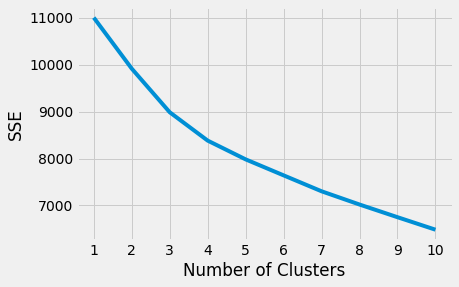

In [14]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [15]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

**Clustering - Kmeans**

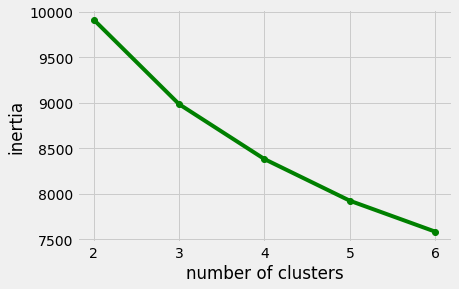

In [16]:
#Encontrando el numero optimo de agrupamientos ( clusters)

ks= range (2,7)
inertias= []

for k in ks:
    model= KMeans(n_clusters=k)
    model.fit(scaled_features)
    inertias.append(model.inertia_)
    
    
plt.plot(ks, inertias, '-o', color='green')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# Nivell 2


- Exercici 2

Classifica els diferents vols utilitzant l'algorisme de clustering jeràrquic.

In [17]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df_sample)
data_scaled = pd.DataFrame(data_scaled, columns=df_sample.columns)
data_scaled.head()

,Month,DayofMonth,DayOfWeek,DepDelay,ArrDelay,ArrTime,DepTime,Distance,UniqueCarrier,Origin,Dest
0,0.004583,0.000417,0.002500,0.033334,0.030834,0.718348,0.669180,0.139169,0.006250,0.082918,0.088335
1,0.003955,0.003955,0.003296,0.064603,0.061307,0.695467,0.605155,0.339493,0.003955,0.163484,0.011866
2,0.002850,0.003919,0.000356,0.021019,0.009619,0.724635,0.661933,0.178487,0.004275,0.057714,0.031351
3,0.001104,0.000552,0.000828,0.004141,0.012424,0.581990,0.455542,0.668405,0.001657,0.041413,0.071506
4,0.001052,0.003156,0.002455,0.037877,0.032967,0.721070,0.613050,0.306525,0.002104,0.087679,0.006313


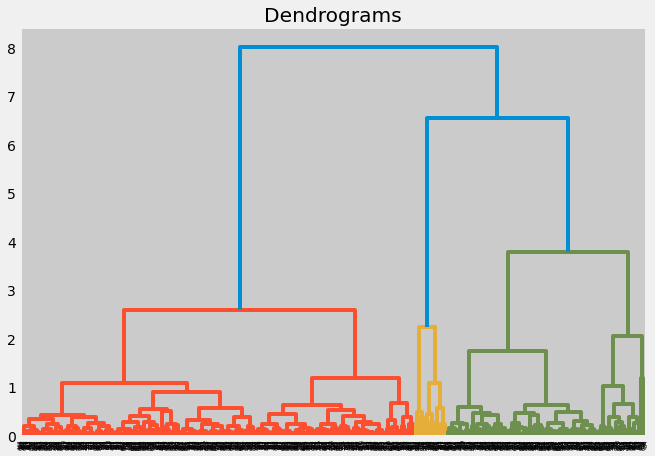

In [18]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

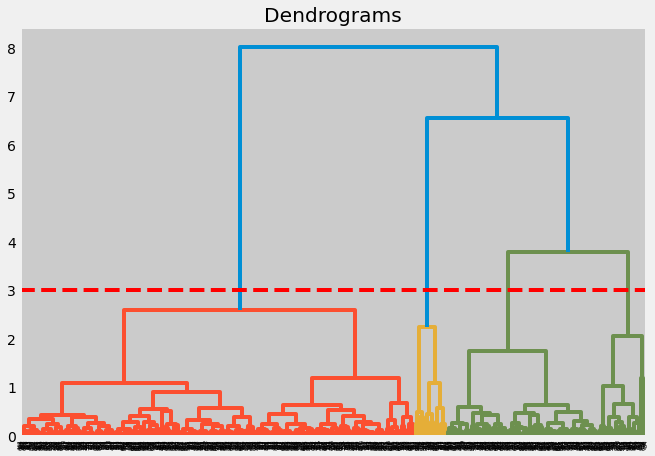

In [23]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=3, color='r', linestyle='--')

In [24]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,

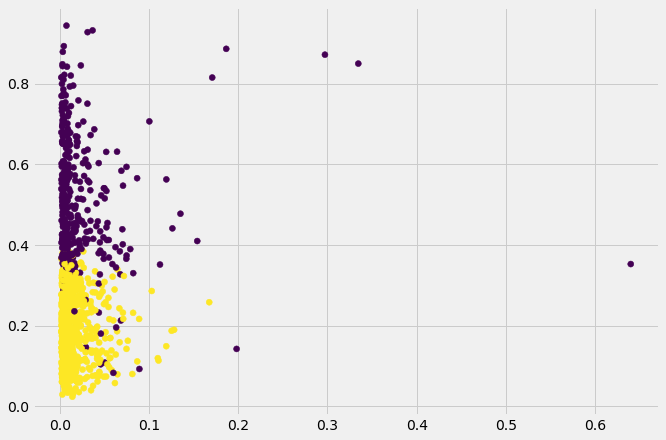

In [25]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['DepDelay'], data_scaled['Distance'], c=cluster.labels_) 

# Nivell 3

- Exercici 3

Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [27]:
silhouette_coefficients = []
  # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

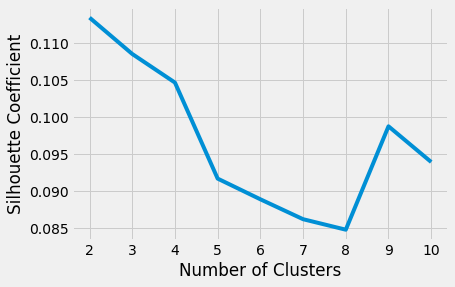

In [28]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()